In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import json

def flatten_metrics(metrics):
    """Flatten metrics dictionary into columns"""
    if not metrics:
        return {}
    return {
        'cpu_percent': metrics.get('cpu_percent', None),
        'memory_percent': metrics.get('memory_percent', None),
        'memory_rss': metrics.get('memory_rss', None),
        'memory_vms': metrics.get('memory_vms', None),
        'threads': metrics.get('threads', None)
    }

def json_to_csv(json_file='benchmark_results.json', output_file='benchmark_results.csv'):
    # Load JSON data
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Extract system info
    system_info = data['system_info']

    # Prepare rows for DataFrame
    rows = []
    for run in data['benchmark_runs']:
        base_row = {
            'size': run['size'],
            'threads': run['threads'],
            'timestamp': run['timestamp'],
            'platform': system_info['platform'],
            'processor': system_info['processor'],
            'cpu_count': system_info['cpu_count'],
            'physical_cpu_count': system_info['physical_cpu_count'],
            'memory_total': system_info['memory_total'],
            'python_version': system_info['python_version']
        }

        # Add test results
        for test in run['tests']:
            row = base_row.copy()
            row.update({
                'language': test['language'],
                'execution_time_ms': test['execution_time_ms'],
                'exit_code': test['exit_code']
            })
            # Add flattened metrics
            row.update(flatten_metrics(test.get('metrics', {})))
            rows.append(row)

    # Create DataFrame and save to CSV
    df = pd.DataFrame(rows)

    # Reorder columns for better readability
    column_order = [
        'timestamp', 'language', 'size', 'threads', 'execution_time_ms',
        'cpu_percent', 'memory_percent', 'memory_rss', 'memory_vms', 'threads',
        'exit_code', 'platform', 'processor', 'cpu_count', 'physical_cpu_count',
        'memory_total', 'python_version'
    ]
    df = df[column_order]

    # Save to CSV
    df.to_csv(output_file, index=False)
    print(f"CSV file created: {output_file}")

    # Print summary statistics
    print("\nSummary Statistics:")
    print("\nExecution Time (ms) by Language:")
    print(df.groupby('language')['execution_time_ms'].describe())

    print("\nMemory Usage (%) by Language:")
    print(df.groupby('language')['memory_percent'].describe())

if __name__ == "__main__":
    json_to_csv()

CSV file created: benchmark_results.csv

Summary Statistics:

Execution Time (ms) by Language:
          count         mean          std         min         25%         50%  \
language                                                                        
cpp       150.0   181.238155   177.944274  102.772474  103.302717  103.801250   
go        150.0   229.790265   250.176493  102.752209  103.557408  104.868054   
haskell   150.0  1058.676577  2079.832284  102.643013  103.804171  254.951715   
python    150.0  2783.496130  4566.346094  102.848530  104.981601  657.788634   

                  75%           max  
language                             
cpp        204.405725   1018.760681  
go         205.488265   1221.243382  
haskell   1185.399294  16624.027729  
python    3626.806378  21425.462008  

Memory Usage (%) by Language:
          count      mean       std       min       25%       50%       75%  \
language                                                                      
c

In [4]:
df = pd.read_csv('benchmark_results.csv')

In [5]:
df.head()

,timestamp,language,size,threads,execution_time_ms,cpu_percent,memory_percent,memory_rss,memory_vms,threads.1,exit_code,platform,processor,cpu_count,physical_cpu_count,memory_total,python_version
0,2024-11-13T15:27:23.536673,cpp,1000,1.0,102.853298,0.0,0.019558,1597440.0,6057984.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
1,2024-11-13T15:27:23.536673,go,1000,2.0,103.625298,0.0,0.025777,2105344.0,105062400.0,2.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
2,2024-11-13T15:27:23.536673,haskell,1000,1.0,103.223324,0.0,0.007472,1142784.0,5648384.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
3,2024-11-13T15:27:23.536673,python,1000,1.0,103.370905,0.0,0.063339,5173248.0,13582336.0,1.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10
4,2024-11-13T15:27:27.076166,cpp,1000,2.0,103.346348,0.0,0.019508,1593344.0,14585856.0,2.0,0,Linux-5.15.146.1-microsoft-standard-WSL2-x86_6...,x86_64,12,6,8167608320,3.8.10


In [6]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nNull values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           600 non-null    object 
 1   language            600 non-null    object 
 2   size                600 non-null    int64  
 3   threads             600 non-null    float64
 4   execution_time_ms   600 non-null    float64
 5   cpu_percent         600 non-null    float64
 6   memory_percent      600 non-null    float64
 7   memory_rss          600 non-null    float64
 8   memory_vms          600 non-null    float64
 9   threads.1           600 non-null    float64
 10  exit_code           600 non-null    int64  
 11  platform            600 non-null    object 
 12  processor           600 non-null    object 
 13  cpu_count           600 non-null    int64  
 14  physical_cpu_count  600 non-null    int64  
 15  memory_total        600 non-null    int64  

In [7]:
# System Information Analysis
print("System Information:")
print(f"Platform: {df['platform'].iloc[0]}")
print(f"Processor: {df['processor'].iloc[0]}")
print(f"CPU Cores: {df['cpu_count'].iloc[0]} (Physical: {df['physical_cpu_count'].iloc[0]})")
print(f"Total Memory: {df['memory_total'].iloc[0] / (1024**3):.2f} GB")
print(f"Python Version: {df['python_version'].iloc[0]}")

System Information:
Platform: Linux-5.15.146.1-microsoft-standard-WSL2-x86_64-with-glibc2.29
Processor: x86_64
CPU Cores: 12 (Physical: 6)
Total Memory: 7.61 GB
Python Version: 3.8.10


In [8]:
# Basic statistics by language
print("Execution Time Statistics by Language (ms):")
stats_by_lang = df.groupby('language')['execution_time_ms'].describe()
print(stats_by_lang)

Execution Time Statistics by Language (ms):
          count         mean          std         min         25%         50%  \
language                                                                        
cpp       150.0   181.238155   177.944274  102.772474  103.302717  103.801250   
go        150.0   229.790265   250.176493  102.752209  103.557408  104.868054   
haskell   150.0  1058.676577  2079.832284  102.643013  103.804171  254.951715   
python    150.0  2783.496130  4566.346094  102.848530  104.981601  657.788634   

                  75%           max  
language                             
cpp        204.405725   1018.760681  
go         205.488265   1221.243382  
haskell   1185.399294  16624.027729  
python    3626.806378  21425.462008  


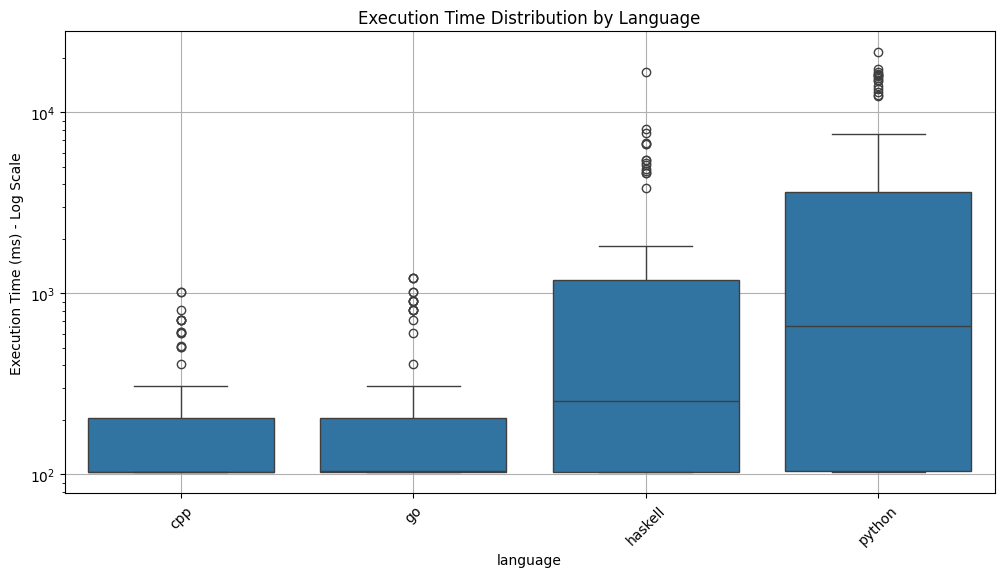

In [9]:
# Performance comparison boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='execution_time_ms', data=df)
plt.title('Execution Time Distribution by Language')
plt.yscale('log')
plt.ylabel('Execution Time (ms) - Log Scale')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

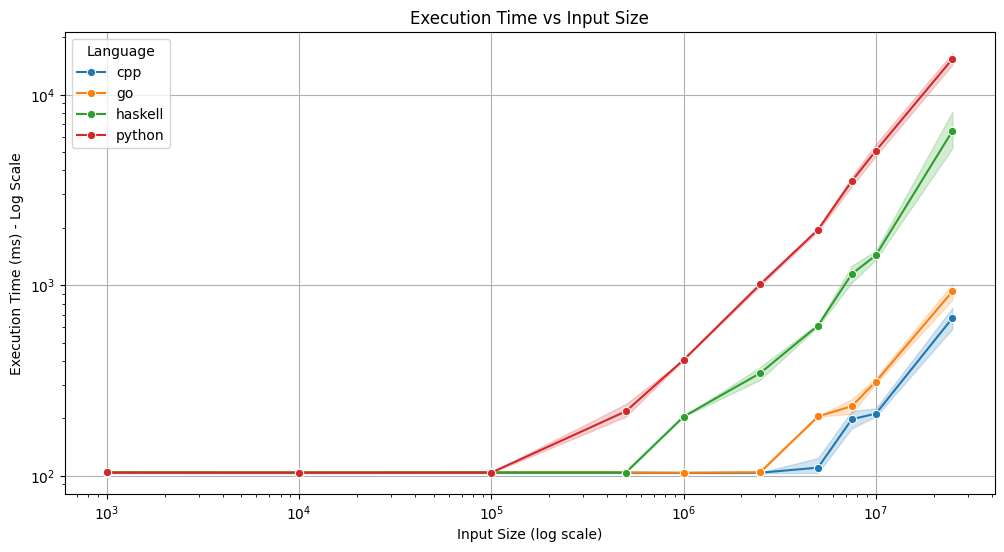

In [10]:
# Performance by input size
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='size', y='execution_time_ms', hue='language', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Execution Time vs Input Size')
plt.xlabel('Input Size (log scale)')
plt.ylabel('Execution Time (ms) - Log Scale')
plt.grid(True)
plt.legend(title='Language')
plt.show()

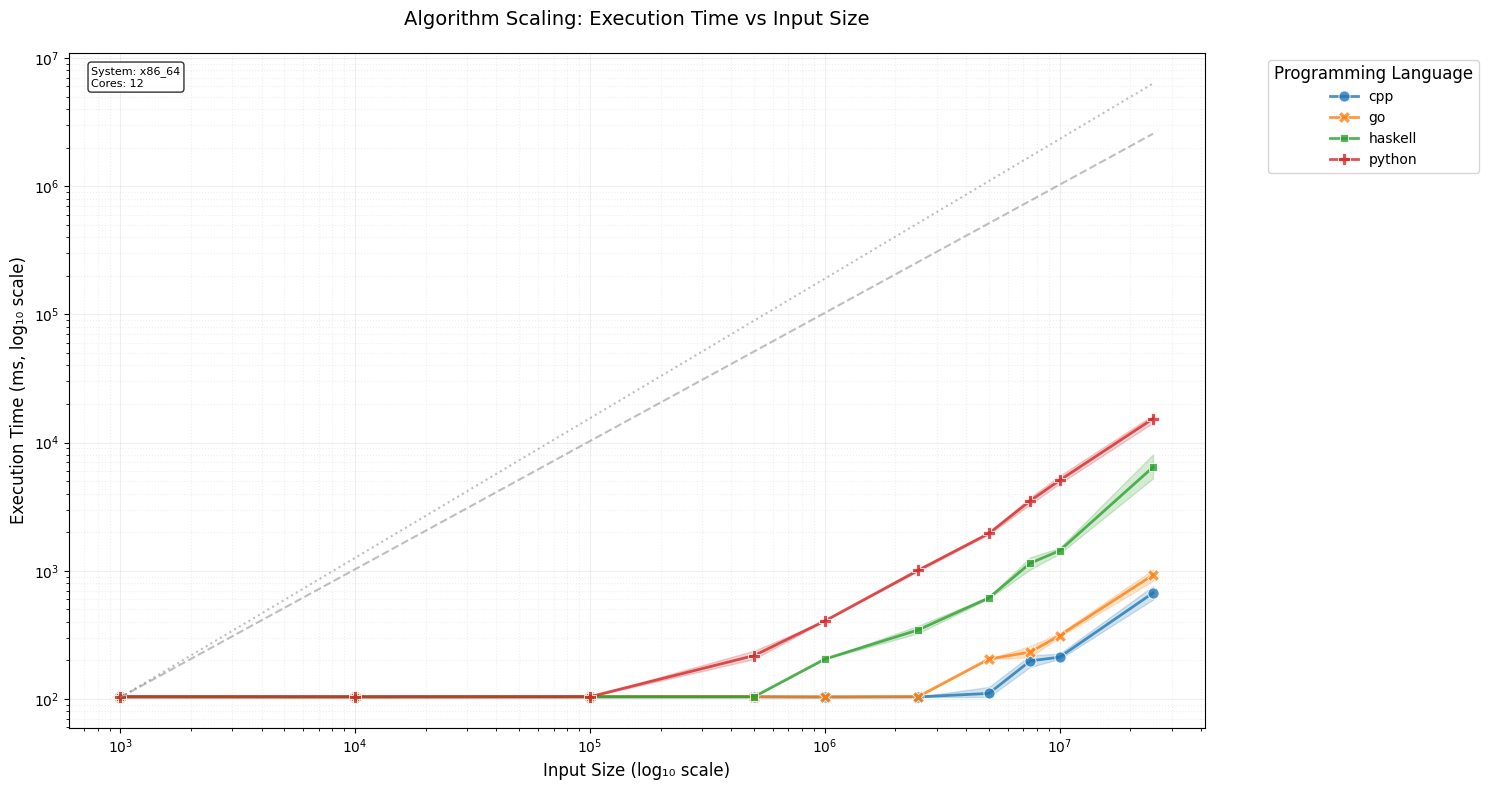


Scaling Analysis:

cpp:
Empirical complexity: O(n^0.11)
R-squared: 0.325
p-value: 2.68e-14

go:
Empirical complexity: O(n^0.15)
R-squared: 0.442
p-value: 1.73e-20

haskell:
Empirical complexity: O(n^0.35)
R-squared: 0.647
p-value: 3.05e-35

python:
Empirical complexity: O(n^0.49)
R-squared: 0.777
p-value: 3.86e-50


In [11]:
# Performance by input size with logarithmic scales
plt.figure(figsize=(15, 8))

# Create the main plot
sns.lineplot(
    data=df,
    x='size',
    y='execution_time_ms',
    hue='language',
    style='language',
    markers=True,
    dashes=False,
    marker='o',
    markersize=8,
    linewidth=2,
    alpha=0.8
)

# Set logarithmic scales
plt.xscale('log', base=10)
plt.yscale('log', base=10)

# Customize grid
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.grid(True, which="minor", ls=":", alpha=0.2)

# Customize title and labels
plt.title('Algorithm Scaling: Execution Time vs Input Size',
          fontsize=14, pad=20)
plt.xlabel('Input Size (log₁₀ scale)', fontsize=12)
plt.ylabel('Execution Time (ms, log₁₀ scale)', fontsize=12)

# Customize legend
plt.legend(
    title='Programming Language',
    title_fontsize=12,
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Add theoretical complexity lines for reference
x = np.array([df['size'].min(), df['size'].max()])
y_linear = x / x[0] * df['execution_time_ms'].min()  # O(n)
y_nlogn = (x * np.log2(x)) / (x[0] * np.log2(x[0])) * df['execution_time_ms'].min()  # O(n log n)

plt.plot(x, y_linear, '--', color='gray', alpha=0.5, label='O(n)')
plt.plot(x, y_nlogn, ':', color='gray', alpha=0.5, label='O(n log n)')

# Adjust layout
plt.tight_layout()

# Add annotations
plt.text(
    0.02, 0.98,
    f'System: {df["processor"].iloc[0]}\nCores: {df["cpu_count"].iloc[0]}',
    transform=plt.gca().transAxes,
    fontsize=8,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Show plot
plt.show()

# Print statistical analysis
print("\nScaling Analysis:")
for language in df['language'].unique():
    language_data = df[df['language'] == language]
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        np.log10(language_data['size']),
        np.log10(language_data['execution_time_ms'])
    )
    print(f"\n{language}:")
    print(f"Empirical complexity: O(n^{slope:.2f})")
    print(f"R-squared: {r_value**2:.3f}")
    print(f"p-value: {p_value:.2e}")

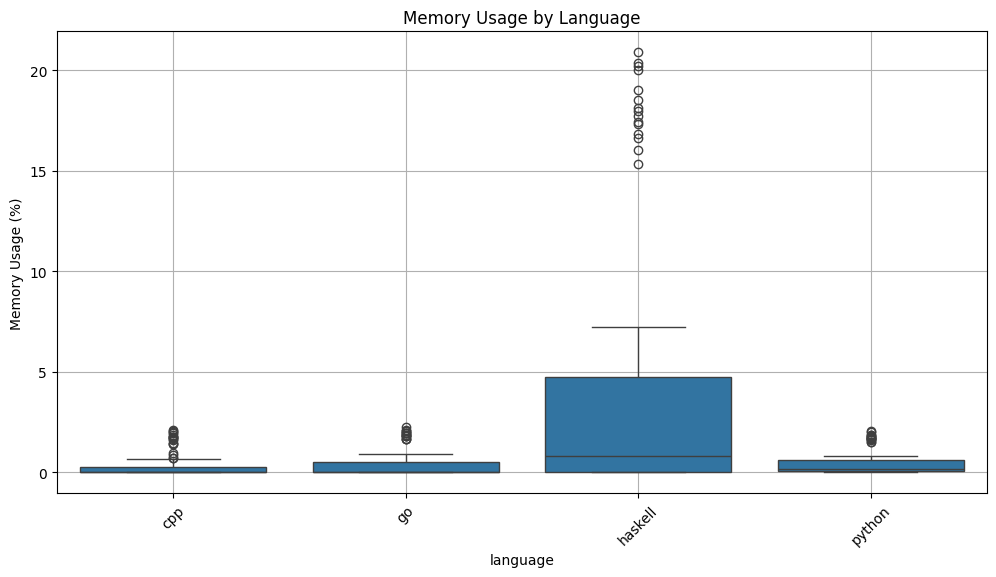

In [13]:
# Memory usage analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='memory_percent', data=df)
plt.title('Memory Usage by Language')
plt.ylabel('Memory Usage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

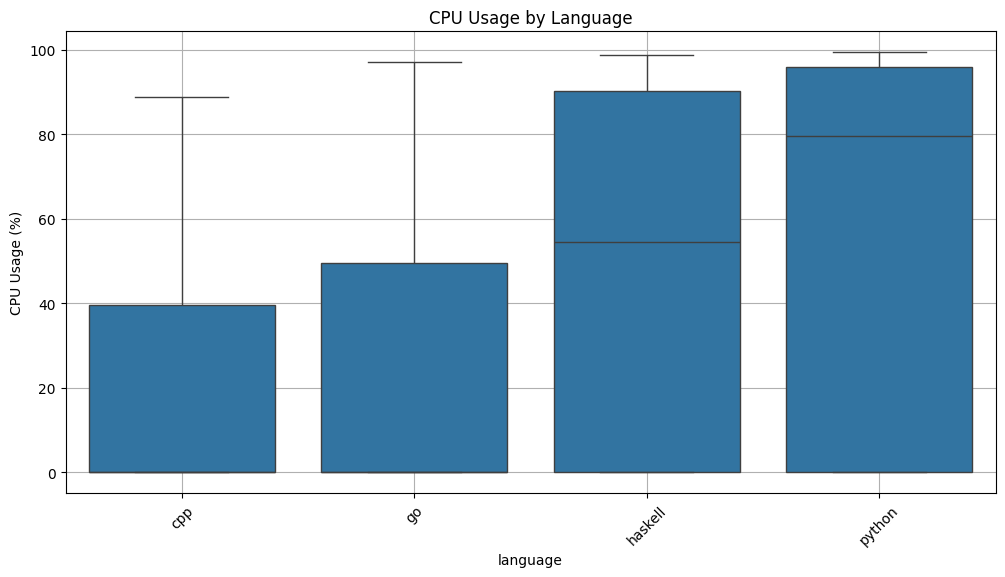

In [14]:
# CPU usage analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='cpu_percent', data=df)
plt.title('CPU Usage by Language')
plt.ylabel('CPU Usage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

=== Análise Estatística dos Benchmarks ===



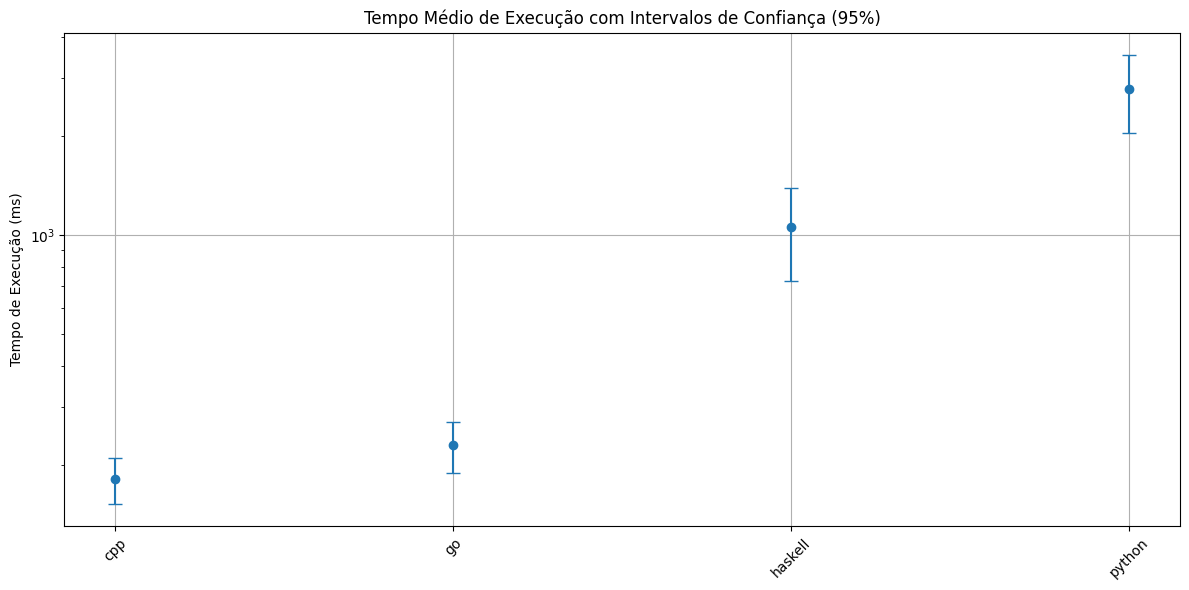

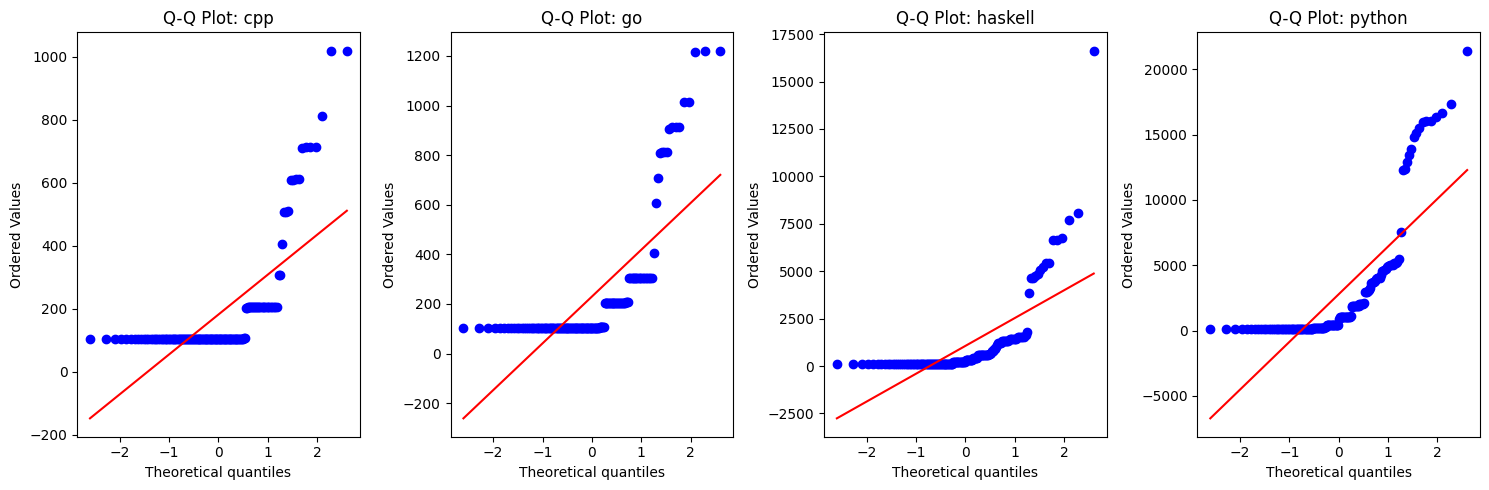


1. Estatísticas por Linguagem:

cpp:
  Média: 181.24 ms
  IC 95%: [152.53, 209.95]
  Desvio Padrão: 177.35
  Coeficiente de Variação: 97.85%

go:
  Média: 229.79 ms
  IC 95%: [189.43, 270.15]
  Desvio Padrão: 249.34
  Coeficiente de Variação: 108.51%

haskell:
  Média: 1058.68 ms
  IC 95%: [723.11, 1394.24]
  Desvio Padrão: 2072.89
  Coeficiente de Variação: 195.80%

python:
  Média: 2783.50 ms
  IC 95%: [2046.76, 3520.23]
  Desvio Padrão: 4551.10
  Coeficiente de Variação: 163.50%

2. ANOVA:
F-statistic: 35.0741
p-value: 6.9292e-21

3. Análise de Tukey (Comparações Múltiplas):
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
    cpp      go   48.5521 0.9983 -699.1868   796.291  False
    cpp haskell  877.4384 0.0139  129.6995 1625.1774   True
    cpp  python  2602.258    0.0  1854.519 3349.9969   True
     go haskell  828.8863  0.023   81.1474 1576.6252  

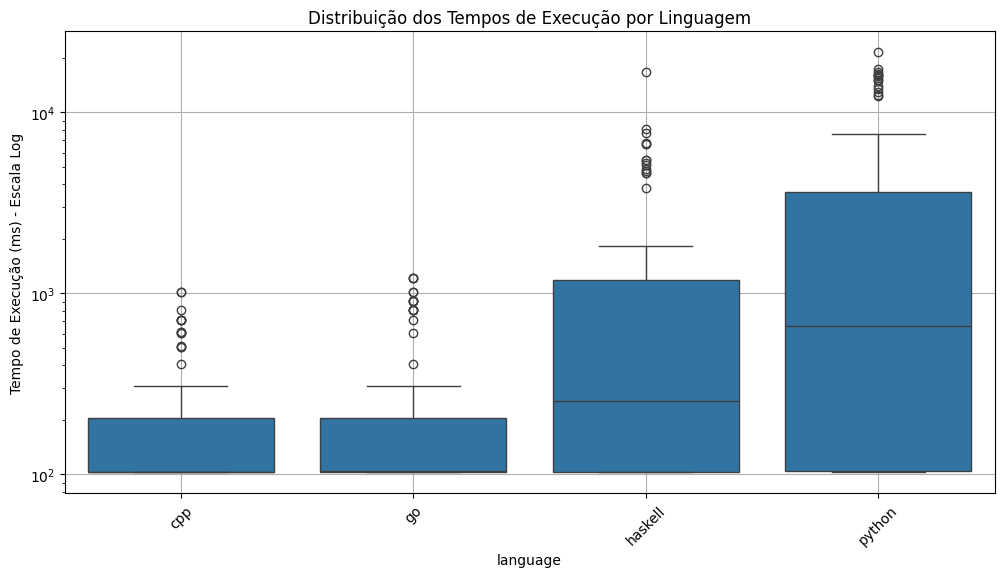

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

def statistical_analysis(df):
    print("=== Análise Estatística dos Benchmarks ===\n")

    # 1. Intervalos de Confiança por Linguagem
    confidence_intervals = {}
    for language in df['language'].unique():
        data = df[df['language'] == language]['execution_time_ms']
        mean = np.mean(data)
        std_err = stats.sem(data)
        ci = stats.t.interval(
            confidence=0.95,  # Corrigido: usando 'confidence' em vez de 'alpha'
            df=len(data)-1,
            loc=mean,
            scale=std_err
        )
        confidence_intervals[language] = {
            'mean': mean,
            'ci_lower': ci[0],
            'ci_upper': ci[1],
            'std': np.std(data),
            'cv': (np.std(data) / mean) * 100
        }

    # Visualização dos Intervalos de Confiança
    plt.figure(figsize=(12, 6))
    languages = list(confidence_intervals.keys())
    means = [confidence_intervals[lang]['mean'] for lang in languages]
    errors = [(confidence_intervals[lang]['ci_upper'] - confidence_intervals[lang]['ci_lower'])/2
              for lang in languages]

    plt.errorbar(languages, means, yerr=errors, fmt='o', capsize=5)
    plt.title('Tempo Médio de Execução com Intervalos de Confiança (95%)')
    plt.ylabel('Tempo de Execução (ms)')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. ANOVA
    languages_data = [group['execution_time_ms'].values for name, group in df.groupby('language')]
    f_stat, p_value = stats.f_oneway(*languages_data)

    # 3. Teste de Tukey
    tukey = pairwise_tukeyhsd(df['execution_time_ms'], df['language'])

    # 4. Q-Q Plots
    plt.figure(figsize=(15, 5))
    for i, language in enumerate(df['language'].unique(), 1):
        plt.subplot(1, len(df['language'].unique()), i)
        data = df[df['language'] == language]['execution_time_ms']
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot: {language}')
    plt.tight_layout()
    plt.show()

    # Impressão dos Resultados
    print("\n1. Estatísticas por Linguagem:")
    for lang, stats_dict in confidence_intervals.items():
        print(f"\n{lang}:")
        print(f"  Média: {stats_dict['mean']:.2f} ms")
        print(f"  IC 95%: [{stats_dict['ci_lower']:.2f}, {stats_dict['ci_upper']:.2f}]")
        print(f"  Desvio Padrão: {stats_dict['std']:.2f}")
        print(f"  Coeficiente de Variação: {stats_dict['cv']:.2f}%")

    print("\n2. ANOVA:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_value:.4e}")

    print("\n3. Análise de Tukey (Comparações Múltiplas):")
    print(tukey)

    # 5. Teste de Normalidade
    print("\n4. Teste de Normalidade (Shapiro-Wilk):")
    for language in df['language'].unique():
        data = df[df['language'] == language]['execution_time_ms']
        stat, p = stats.shapiro(data)
        print(f"{language}:")
        print(f"  Estatística: {stat:.4f}")
        print(f"  p-value: {p:.4e}")

    # 6. Análise por Tamanho de Input
    print("\n5. Análise por Tamanho de Input:")
    for size in df['size'].unique():
        size_data = df[df['size'] == size]
        print(f"\nTamanho {size}:")
        for language in df['language'].unique():
            lang_data = size_data[size_data['language'] == language]['execution_time_ms']
            if len(lang_data) > 0:
                print(f"  {language}:")
                print(f"    Média: {np.mean(lang_data):.2f} ms")
                print(f"    Desvio Padrão: {np.std(lang_data):.2f}")
                print(f"    CV: {(np.std(lang_data)/np.mean(lang_data))*100:.2f}%")

    return confidence_intervals, tukey

# Executar a análise
confidence_intervals, tukey = statistical_analysis(df)

# Adicionar visualização de distribuição
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='execution_time_ms', data=df)
plt.yscale('log')
plt.title('Distribuição dos Tempos de Execução por Linguagem')
plt.ylabel('Tempo de Execução (ms) - Escala Log')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()